In [1]:
from gradients import *

In [26]:
df = pd.read_csv('subjects_gradients_ecc.csv', dtype={'comp': object}).drop('Unnamed: 0', axis=1)

In [27]:
df

,region_idx,value,subj,epic,comp
0,0,-0.774317,1,baseline,0
1,1,-1.407623,1,baseline,0
2,2,-1.905399,1,baseline,0
3,3,-1.225759,1,baseline,0
4,4,-0.971639,1,baseline,0
...,...,...,...,...,...
479035,993,1.497172,46,late_learning,ecc
479036,994,2.645587,46,late_learning,ecc
479037,995,0.922904,46,late_learning,ecc
479038,996,2.302812,46,late_learning,ecc


In [28]:
df.shape[0] / 998 / 40 / 3 / 4

1.0

In [29]:
df.comp.unique()

array(['0', '1', '2', 'ecc'], dtype=object)

In [33]:
df.subj.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 33, 35, 36, 38, 39,
       40, 42, 43, 44, 45, 46])

---

In [ ]:
# TODO ttest for epics

In [11]:
d2 = df[(df.region_idx == 1)
& (df.epic == 'late_learning')
& (df.comp == 'ecc')
]

d2

,region_idx,value,subj,epic,comp
359281,1,1.606313,1,baseline,ecc
362275,1,0.496450,2,baseline,ecc
365269,1,4.227021,3,baseline,ecc
368263,1,2.514823,4,baseline,ecc
371257,1,1.130451,5,baseline,ecc
374251,1,2.087999,6,baseline,ecc
377245,1,1.805020,7,baseline,ecc
380239,1,2.810723,8,baseline,ecc
383233,1,1.121538,9,baseline,ecc
386227,1,1.491182,10,baseline,ecc


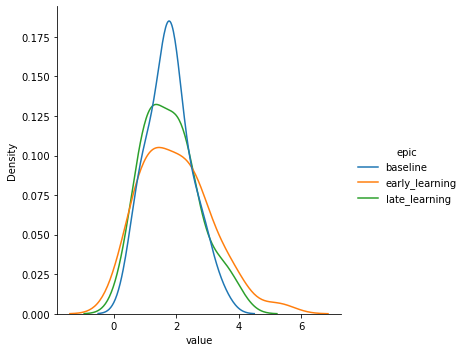

In [ ]:
sns.displot(
    x='value', hue='epic',
    data=df[
        (df.region_idx == 100) & (df.comp == 'ecc')
    ],
    kind='kde'
)

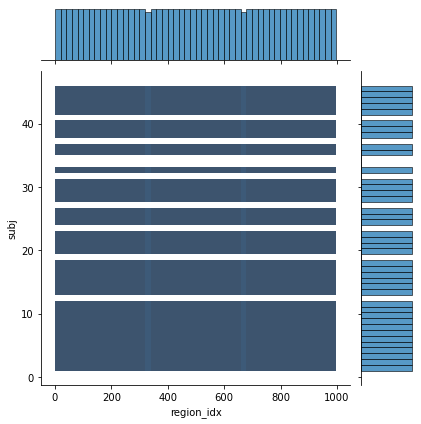

In [ ]:
sns.jointplot(
    x='region_idx', y='subj',
    data=df[df.comp == 'ecc'],
    kind='hist'
)

---

In [34]:
from scipy import stats

In [37]:
stats.ttest_ind([1,2,4], [4, 5])

Ttest_indResult(statistic=-1.8085816934646561, pvalue=0.16822899527384716)

In [ ]:
stats.f_oneway([1,2,4], [4, 5], [23, 53, 6])

F_onewayResult(statistic=2.411747473267907, pvalue=0.18482467264369268)

---

In [108]:
EPICS = df.epic.unique().tolist()
EPICS

['baseline', 'early_learning', 'late_learning']

In [114]:
df.groupby(['epic', 'comp']).value.mean()

epic            comp
baseline        0      -2.346987e-17
                1      -3.659954e-18
                2       4.538788e-18
                ecc     2.749806e+00
early_learning  0      -7.279859e-17
                1      -5.775273e-17
                2      -2.990955e-17
                ecc     2.960457e+00
late_learning   0       5.572669e-18
                1       4.041245e-17
                2      -2.881240e-18
                ecc     2.914213e+00
Name: value, dtype: float64

In [115]:
df

,region_idx,value,subj,epic,comp
0,0,-0.774317,1,baseline,0
1,1,-1.407623,1,baseline,0
2,2,-1.905399,1,baseline,0
3,3,-1.225759,1,baseline,0
4,4,-0.971639,1,baseline,0
...,...,...,...,...,...
479035,993,1.497172,46,late_learning,ecc
479036,994,2.645587,46,late_learning,ecc
479037,995,0.922904,46,late_learning,ecc
479038,996,2.302812,46,late_learning,ecc


In [174]:
rois = df.groupby(['epic', 'comp', 'region_idx']).value.apply(list).reset_index()
rois

,epic,comp,region_idx,value
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2..."
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00..."
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3...."
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2..."
...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931..."
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440..."
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352..."
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967..."


In [133]:
d.shape[0] / 4 / 998 / 3

1.0

In [135]:
rois

,epic,comp,region_idx,value
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2..."
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00..."
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3...."
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2..."
...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931..."
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440..."
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352..."
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967..."


In [145]:
rois.groupby('region_idx').value.count()

region_idx
0      12
1      12
2      12
3      12
4      12
       ..
993    12
994    12
995    12
996    12
997    12
Name: value, Length: 998, dtype: int64

In [155]:
# rois['epic_comp'] = rois.drop('value', axis=1).drop_duplicates().apply(lambda x: x['epic']+'__'+x['comp'], axis=1)
# rois

,epic,comp,region_idx,value,epic_comp
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...",baseline__0
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2...",baseline__0
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00...",baseline__0
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3....",baseline__0
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2...",baseline__0
...,...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931...",late_learning__ecc
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440...",late_learning__ecc
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352...",late_learning__ecc
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967...",late_learning__ecc


compare epics within a comp

In [197]:
rois

,epic,comp,region_idx,value
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2..."
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00..."
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3...."
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2..."
...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931..."
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440..."
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352..."
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967..."


In [204]:
11976 * 6

71856

In [203]:
rois.groupby(['comp','region_idx']).value.count()

comp  region_idx
0     0             3
      1             3
      2             3
      3             3
      4             3
                   ..
ecc   993           3
      994           3
      995           3
      996           3
      997           3
Name: value, Length: 3992, dtype: int64

In [226]:
d1 = rois.merge(rois, on=['comp', 'region_idx'])

In [227]:
d1.shape[0] #* (9 - 3)

35928

In [209]:
d1

,epic_x,comp,region_idx,value_x,epic_y,value_y
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...",baseline,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...",early_learning,"[-1.3790257691713863, -0.3557717007692541, 1.1..."
2,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...",late_learning,"[-0.7246362897334399, 1.2471803638052508, -1.2..."
3,early_learning,0,0,"[-1.3790257691713863, -0.3557717007692541, 1.1...",baseline,"[-0.7743170065748008, -1.597662094371461, 0.29..."
4,early_learning,0,0,"[-1.3790257691713863, -0.3557717007692541, 1.1...",early_learning,"[-1.3790257691713863, -0.3557717007692541, 1.1..."
...,...,...,...,...,...,...
35923,early_learning,ecc,997,"[2.8296215918597705, 2.044712197309108, 2.8872...",early_learning,"[2.8296215918597705, 2.044712197309108, 2.8872..."
35924,early_learning,ecc,997,"[2.8296215918597705, 2.044712197309108, 2.8872...",late_learning,"[2.830983731387465, 2.727994046109694, 2.52764..."
35925,late_learning,ecc,997,"[2.830983731387465, 2.727994046109694, 2.52764...",baseline,"[1.2574384221443062, 1.4800483679532332, 2.658..."
35926,late_learning,ecc,997,"[2.830983731387465, 2.727994046109694, 2.52764...",early_learning,"[2.8296215918597705, 2.044712197309108, 2.8872..."


In [208]:
35928 / 11976

3.0

In [210]:
d1[~(d1.epic_x == d1.epic_y)].shape[0]

23952

In [211]:
23952 + 11976

35928

In [230]:
d1 = d1[~(d1.epic_x == d1.epic_y)]

In [232]:
d1['diff'] = d1.apply(lambda r: r['epic_x'] + '_2_' + r['epic_y']
if (r['epic_x'] < r['epic_y'])
else r['epic_y'] + '_2_' + r['epic_x'], axis=1)

In [240]:
d1 = d1.drop_duplicates(['comp', 'region_idx', 'diff']).drop(['epic_x', 'epic_y'], axis=1)

In [241]:
d1

,comp,region_idx,value_x,value_y,diff
1,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...","[-1.3790257691713863, -0.3557717007692541, 1.1...",baseline_2_early_learning
2,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29...","[-0.7246362897334399, 1.2471803638052508, -1.2...",baseline_2_late_learning
5,0,0,"[-1.3790257691713863, -0.3557717007692541, 1.1...","[-0.7246362897334399, 1.2471803638052508, -1.2...",early_learning_2_late_learning
10,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2...","[-1.413488351505512, 1.18449490893659, -3.0256...",baseline_2_early_learning
11,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2...","[0.4866560388024213, -1.1284565844785064, -2.7...",baseline_2_late_learning
...,...,...,...,...,...
35912,ecc,996,"[2.2656535484103486, 1.944684617879056, 2.7301...","[2.577951902303398, 2.692900243291526, 2.55967...",baseline_2_late_learning
35915,ecc,996,"[3.9632933796953633, 2.265388679626523, 2.5270...","[2.577951902303398, 2.692900243291526, 2.55967...",early_learning_2_late_learning
35920,ecc,997,"[1.2574384221443062, 1.4800483679532332, 2.658...","[2.8296215918597705, 2.044712197309108, 2.8872...",baseline_2_early_learning
35921,ecc,997,"[1.2574384221443062, 1.4800483679532332, 2.658...","[2.830983731387465, 2.727994046109694, 2.52764...",baseline_2_late_learning


In [246]:
d1['tstat'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).statistic, axis=1)
d1['pvalue'] = d1.apply(lambda x: stats.ttest_ind(x['value_x'], x['value_y']).pvalue, axis=1)
ALPHA = 0.05
d1['signif'] = d1.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [ ]:
d1 = d1.drop(['value_x', 'value_y'], axis=1)

In [ ]:
d1

,comp,region_idx,diff,tstat,pvalue,signif
1,0,0,baseline_2_early_learning,-0.380866,0.704338,0
2,0,0,baseline_2_late_learning,-1.296331,0.198684,0
5,0,0,early_learning_2_late_learning,-0.823735,0.412602,0
10,0,1,baseline_2_early_learning,0.543909,0.588056,0
11,0,1,baseline_2_late_learning,0.712946,0.478007,0
...,...,...,...,...,...,...
35912,ecc,996,baseline_2_late_learning,-0.092822,0.926283,0
35915,ecc,996,early_learning_2_late_learning,-0.773563,0.441528,0
35920,ecc,997,baseline_2_early_learning,-1.233566,0.221069,0
35921,ecc,997,baseline_2_late_learning,-1.052815,0.295677,0


In [282]:
# d1.to_csv('rois_pairwise_stats.csv')

plotting

In [259]:
d1[(d1.comp=='ecc')&(d1['diff']=='baseline_2_early_learning')]

,comp,region_idx,diff,tstat,pvalue,signif
26947,ecc,0,baseline_2_early_learning,-0.444305,0.658053,0
26956,ecc,1,baseline_2_early_learning,-1.124894,0.264084,0
26965,ecc,2,baseline_2_early_learning,-0.938319,0.350977,0
26974,ecc,3,baseline_2_early_learning,-0.050211,0.960082,0
26983,ecc,4,baseline_2_early_learning,0.543548,0.588303,0
...,...,...,...,...,...,...
35884,ecc,993,baseline_2_early_learning,0.985519,0.327416,0
35893,ecc,994,baseline_2_early_learning,-1.471310,0.145230,0
35902,ecc,995,baseline_2_early_learning,-0.136631,0.891674,0
35911,ecc,996,baseline_2_early_learning,0.742014,0.460307,0


In [276]:
statistics = ['tstat', 'pvalue', 'signif']
modalities = ['ecc']

In [280]:
statistics = ['signif']
modalities = ['0']

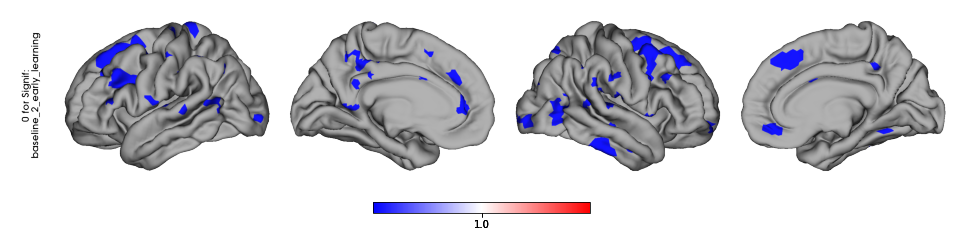

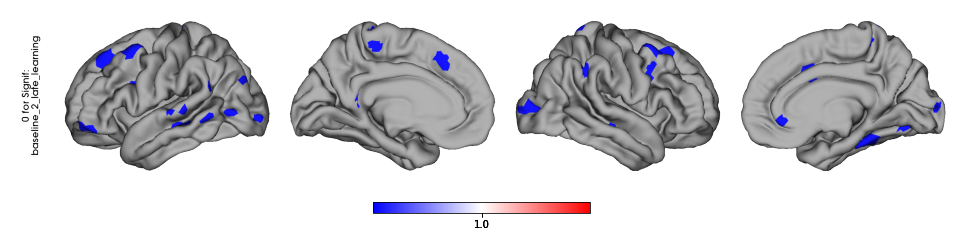

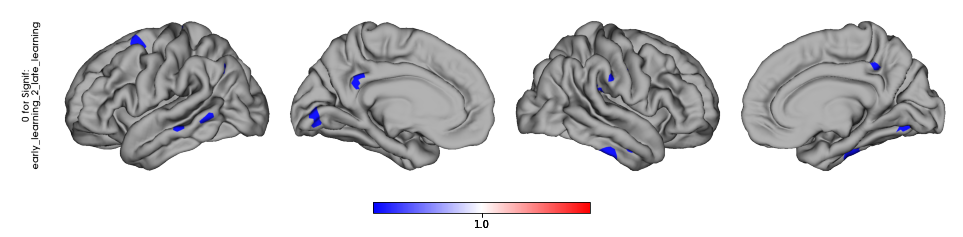

In [281]:
for c in modalities:
    for contrast in d1['diff'].unique():
        d = d1[(d1['comp'] == c)&(d1['diff'] == contrast)]
        for s in statistics:
            data = np.array(d[s])
            data = map_to_labels(data, surf_labels, mask=mask_removed)
            stack_surfplot(data, c.capitalize() + ' for ' + s.capitalize() + ':\n' + contrast, 'bwr', None)

---

In [ ]:
# TODO f value for anova on each epic (ecc included)

In [ ]:
f_anova_thresh = 1

In [296]:
rois

,epic,comp,region_idx,value
0,baseline,0,0,"[-0.7743170065748008, -1.597662094371461, 0.29..."
1,baseline,0,1,"[-1.4076225483498692, 0.4911792468296018, -3.2..."
2,baseline,0,2,"[-1.9053989206588555, 2.476543594211244, -3.00..."
3,baseline,0,3,"[-1.2257587934677732, -1.0593325749036806, -3...."
4,baseline,0,4,"[-0.9716389947455218, -1.446878671812038, -3.2..."
...,...,...,...,...
11971,late_learning,ecc,993,"[2.527571017762124, 2.9239077240085125, 3.0931..."
11972,late_learning,ecc,994,"[2.3328999688422964, 2.240706812380316, 2.6440..."
11973,late_learning,ecc,995,"[2.293418571562177, 2.381527520659193, 2.59352..."
11974,late_learning,ecc,996,"[2.577951902303398, 2.692900243291526, 2.55967..."


In [301]:
d2 = rois.groupby(['comp', 'region_idx']).value.apply(list).reset_index()

In [297]:
3992 / 998

4.0

In [305]:
d2

,comp,region_idx,value
0,0,0,"[[-0.7743170065748008, -1.597662094371461, 0.2..."
1,0,1,"[[-1.4076225483498692, 0.4911792468296018, -3...."
2,0,2,"[[-1.9053989206588555, 2.476543594211244, -3.0..."
3,0,3,"[[-1.2257587934677732, -1.0593325749036806, -3..."
4,0,4,"[[-0.9716389947455218, -1.446878671812038, -3...."
...,...,...,...
3987,ecc,993,"[[2.878588733458335, 1.738677794356745, 3.3424..."
3988,ecc,994,"[[2.63374566382278, 2.9651404831840247, 1.4733..."
3989,ecc,995,"[[2.1138911715732043, 2.1222181638594177, 1.99..."
3990,ecc,996,"[[2.2656535484103486, 1.944684617879056, 2.730..."


In [309]:
d2['fstat'] = d2.value.apply(lambda x: stats.f_oneway(*x).statistic)
d2['pvalue'] = d2.value.apply(lambda x: stats.f_oneway(*x).pvalue)

ALPHA = 0.05
d2['signif'] = d2.pvalue.apply(lambda x: 1 if x < ALPHA else 0)

In [310]:
d2 = d2.drop('value', axis=1)

In [311]:
d2

,comp,region_idx,fstat,pvalue,signif
0,0,0,0.833821,0.436951,0
1,0,1,0.250755,0.778630,0
2,0,2,0.977782,0.379197,0
3,0,3,1.319965,0.271093,0
4,0,4,0.738239,0.480168,0
...,...,...,...,...,...
3987,ecc,993,0.610801,0.544638,0
3988,ecc,994,1.507302,0.225776,0
3989,ecc,995,0.010341,0.989714,0
3990,ecc,996,0.377646,0.686306,0


In [312]:
# d2.to_csv('rois_anova_stats.csv')

plotting

In [313]:
statistics = ['fstat', 'pvalue', 'signif']
modalities = ['ecc']

In [321]:
statistics = ['signif', 'fstat']
modalities = ['ecc', '0']

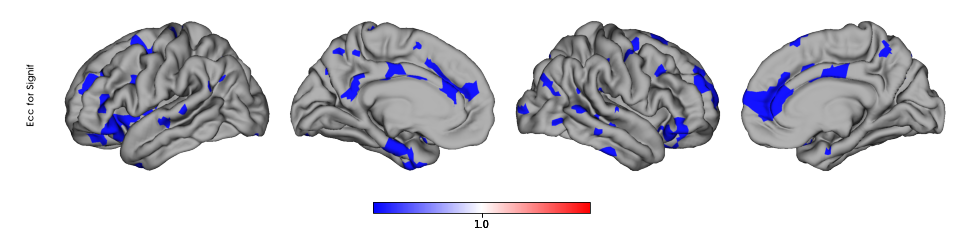

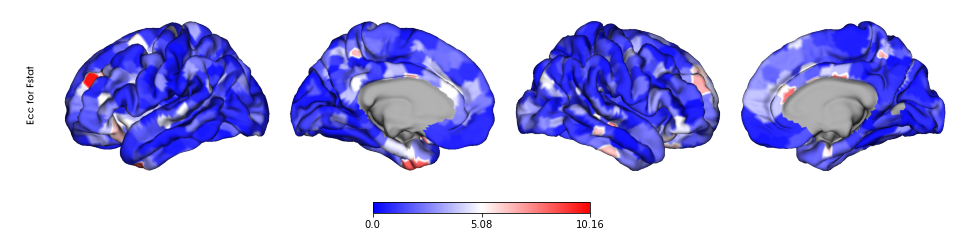

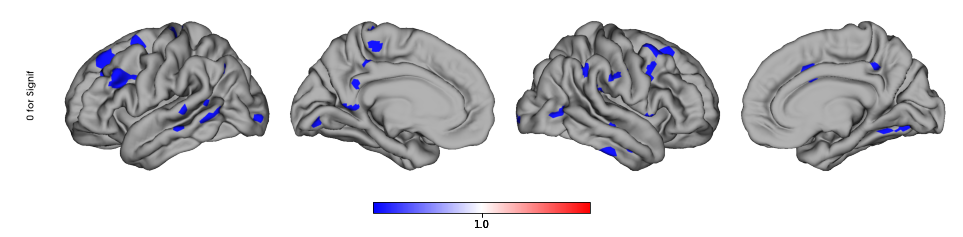

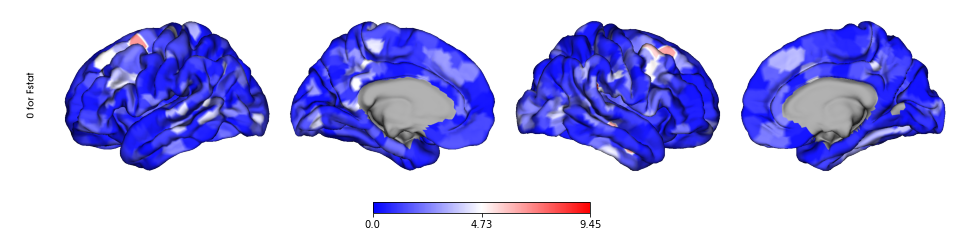

In [322]:
for c in modalities:
    d = d2[d2['comp'] == c]
    for s in statistics:
        data = np.array(d[s])
        data = map_to_labels(data, surf_labels, mask=mask_removed)
        stack_surfplot(data, c.capitalize() + ' for ' + s.capitalize(), 'bwr', None)

---